 Keras -- MLPs on MNIST




In [0]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal  #or xaiver/Hae normilization

# Importing libraries
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time

In [0]:
'''%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()'''

# this function is used draw Categorical Crossentropy Loss VS No. of epochs plot
def plt_dynamic(x, vy, ty):
  plt.figure(figsize=(10,5))
  plt.plot(x, vy, 'b', label="Validation Loss")
  plt.plot(x, ty, 'r', label="Train Loss")
  plt.xlabel('Epochs') 
  plt.ylabel('Categorical Crossentropy Loss')
  plt.title('\nCategorical Crossentropy Loss VS Epochs')
  plt.legend()
  plt.grid()
  plt.show()

In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [69]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [71]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [72]:
# An example data point
#pixel value near to 255 is black and near to 0 is white. in middel is gray
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [74]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [75]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) #one hot incoding
Y_test = np_utils.to_categorical(y_test, 10)#one hot incoding

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


#Simple  Softmax classifier with optimizer='sgd'

In [0]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [0]:
# start building a model
model = Sequential()#output of one model goe to input to second model

# The model needs to know what input shape it should expect. 
# For this reason, the first layer in a Sequential model 
# (and only the first, because following layers can do automatic shape inference)
# needs to receive information about its input shape. 
# you can use input_shape and input_dim to pass the shape of input

# output_dim represent the number of nodes need in that layer
# here we have 10 nodes

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [16]:
# Before training a model, you need to configure the learning process, which is done via the compile method

# It receives three arguments:
# An optimizer. This could be the string identifier of an existing optimizer , https://keras.io/optimizers/
# A loss function. This is the objective that the model will try to minimize., https://keras.io/losses/
# A list of metrics. For any classification problem you will want to set this to metrics=['accuracy'].  https://keras.io/metrics/


# Note: when using the categorical_crossentropy loss, your targets should be in categorical format 
# (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except 
# for a 1 at the index corresponding to the class of the sample).

# that is why we converted out labels into vectors

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Keras models are trained on Numpy arrays of input data and labels. 
# For training a model, you will typically use the  fit function

# fit(self, x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, 
# validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, 
# validation_steps=None)

# fit() function Trains the model for a fixed number of epochs (iterations on a dataset).

# it returns A History object. Its History.history attribute is a record of training loss values and 
# metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

# https://github.com/openai/baselines/issues/20

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 


W0623 18:21:52.679665 140469971335040 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0623 18:21:52.716533 140469971335040 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0623 18:21:52.828167 140469971335040 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0623 18:21:52.872838 140469971335040 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 82us/step - loss: 1.2807 - acc: 0.7030 - val_loss: 0.8106 - val_acc: 0.8351
Epoch 2/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.7120 - acc: 0.8460 - val_loss: 0.6045 - val_acc: 0.8635
Epoch 3/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.5833 - acc: 0.8628 - val_loss: 0.5229 - val_acc: 0.8749
Epoch 4/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.5223 - acc: 0.8710 - val_loss: 0.4777 - val_acc: 0.8816
Epoch 5/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.4852 - acc: 0.8765 - val_loss: 0.4482 - val_acc: 0.8867
Epoch 6/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.4599 - acc: 0.8813 - val_loss: 0.4267 - val_acc: 0.8901
Epoch 7/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.4410 - acc: 0.8845 - val_loss: 0.4108 - val_acc

Test score: 0.3344697316288948
Test accuracy: 0.9097


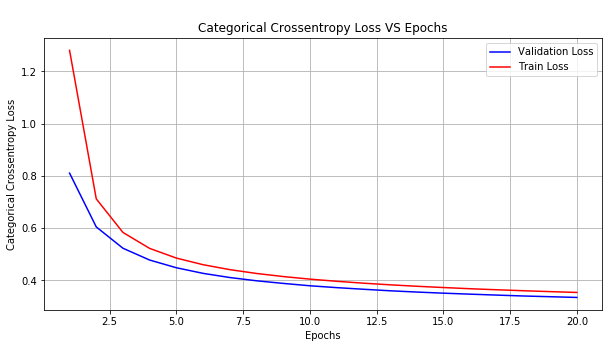

In [30]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

#fig,ax = plt.subplots(1,1)
#ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# Test and train accuracy of the model
model_test_score = score[0]
model_test_acc = score[1]
model_train = history.history['acc']

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty)

# MLP + ReLu activation + Adam Optimizer + 2-Layer(  experiment)

In [42]:
# Multilayer perceptron

from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras.initializers import he_normal

#paramter
output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

model_sigmoid = Sequential()
# Adding first hidden layer
model_sigmoid.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))

# Adding second hidden layer
model_sigmoid.add(Dense(52, activation='relu', kernel_initializer=he_normal(seed=None)))

# Adding output layer
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 364)               285740    
_________________________________________________________________
dense_9 (Dense)              (None, 52)                18980     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                530       
Total params: 305,250
Trainable params: 305,250
Non-trainable params: 0
_________________________________________________________________


In [43]:
model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.2754 - acc: 0.9219 - val_loss: 0.1296 - val_acc: 0.9620
Epoch 2/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.1024 - acc: 0.9696 - val_loss: 0.0875 - val_acc: 0.9737
Epoch 3/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.0656 - acc: 0.9799 - val_loss: 0.0865 - val_acc: 0.9747
Epoch 4/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.0454 - acc: 0.9863 - val_loss: 0.0758 - val_acc: 0.9754
Epoch 5/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.0360 - acc: 0.9891 - val_loss: 0.0660 - val_acc: 0.9788
Epoch 6/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.0255 - acc: 0.9923 - val_loss: 0.0702 - val_acc: 0.9785
Epoch 7/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.0199 - acc: 0.9940 - val_loss: 0.0767 - val_acc

Test score: 0.09218703215732788
Test accuracy: 0.9814


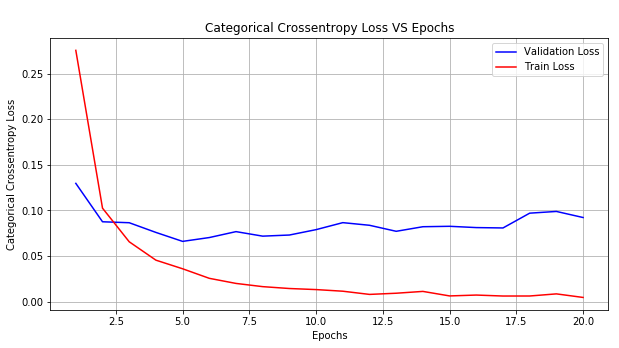

In [45]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

#fig,ax = plt.subplots(1,1)
#ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
model_sigmoid_test_score = score[0]
model_sigmoid_test_acc = score[1]
model_sigmoid_train = history2.history['acc']

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history2.history['val_loss']
ty = history2.history['loss']
plt_dynamic(x, vy, ty)

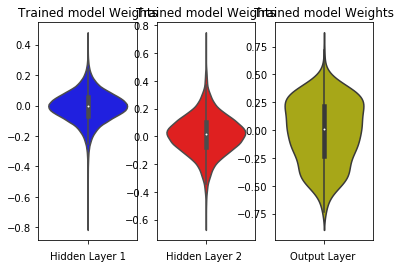

In [46]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2>MLP + Sigmoid activation + ADAM </h2>

In [0]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.5448 - acc: 0.8565 - val_loss: 0.2545 - val_acc: 0.9280
Epoch 2/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.2238 - acc: 0.9340 - val_loss: 0.1907 - val_acc: 0.9431
Epoch 3/20
60000/60000 [==============================] - 2s 33us/step - los

In [0]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Test score: 0.06838007308253509
Test accuracy: 0.9815


<IPython.core.display.Javascript object>

In [0]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<IPython.core.display.Javascript object>

<h2> MLP + ReLU +SGD </h2>

In [0]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.125)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.7739 - acc: 0.7814 - val_loss: 0.3893 - val_acc: 0.8934
Epoch 2/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.3523 - acc: 0.9004 - val_loss: 0.2989 - val_acc: 0.9156
Epoch 3/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.2888 - acc: 0.9170 - val_loss: 0.2611 - val_acc: 0.9269
Epoch 4/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.2540 - acc: 0.9280 - val_loss: 0.2368 - val_acc: 0.9321
Epoch 5/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.2299 - acc: 0.9343 - val_loss: 0.2197 - val_acc: 0.9369
Epoch 6/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.2116 - acc: 0.9396 - val_loss: 0.2043 - val_acc: 0.9401
Epoch 7/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.1965 - acc: 0.9439 - val_loss: 0.1924 - val_acc

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Test score: 0.1236097104612738
Test accuracy: 0.9636


<IPython.core.display.Javascript object>

In [0]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<IPython.core.display.Javascript object>

<h2> MLP + ReLU + ADAM </h2>

In [0]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.2362 - acc: 0.9292 - val_loss: 0.1135 - val_acc: 0.9645
Epoch 2/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0872 - acc: 0.9743 - val_loss: 0.0889 - val_acc: 0.9730
Epoch 3/20
60000/60000 [==============================] - 2s 33us/step 

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Test score: 0.09147267398560358
Test accuracy: 0.9811


<IPython.core.display.Javascript object>

In [0]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<IPython.core.display.Javascript object>

<h2> MLP + Batch-Norm on hidden Layers + AdamOptimizer </2>

In [0]:
#type of initializer ,,https://keras.io/initializers/
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_15 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [0]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.3067 - acc: 0.9101 - val_loss: 0.2085 - val_acc: 0.9374
Epoch 2/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.1726 - acc: 0.9494 - val_loss: 0.1664 - val_acc: 0.9507
Epoch 3/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.1375 - acc: 0.9593 - val_loss: 0.1487 - val_acc: 0.9547
Epoch 4/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.1116 - acc: 0.9666 - val_loss: 0.1414 - val_acc: 0.9571
Epoch 5/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0939 - acc: 0.9712 - val_loss: 0.1264 - val_acc: 0.9610
Epoch 6/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0828 - acc: 0.9751 - val_loss: 0.1172 - val_acc: 0.9662
Epoch 7/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0703 - acc: 0.9780 - val_loss: 0.1144 - val_acc

In [0]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Test score: 0.09926731985980877
Test accuracy: 0.9745


<IPython.core.display.Javascript object>

In [0]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<IPython.core.display.Javascript object>

In [0]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, y, y_1, ax, ticks,title, colors=['b']):
    ax.plot(x, y, 'b', label="Train Loss")
    ax.plot(x, y_1, 'r', label="Test Loss")
    if len(x)==1:
        plt.legend()
        plt.title(title)
    plt.yticks(ticks)
    fig.canvas.draw()

#MLP + ReLu activation + Adam Optimizer + BN+Dropout+ 2-Layer



In [76]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras.initializers import he_normal

#paramter
output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20


# Initialising model
model_drop = Sequential()

# Adding first hidden layer
model_drop.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
# Adding Batch Normalization
model_drop.add(BatchNormalization())
# Adding dropout to first hidden layer
model_drop.add(Dropout(0.5))

# Adding second hidden layer
model_drop.add(Dense(52, activation='relu', kernel_initializer=he_normal(seed=None)))
# Adding Batch Normalization
model_drop.add(BatchNormalization())
# Adding dropout to second hidden layer
model_drop.add(Dropout(0.5))

# Adding output layer
model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 364)               285740    
_________________________________________________________________
batch_normalization_13 (Batc (None, 364)               1456      
_________________________________________________________________
dropout_13 (Dropout)         (None, 364)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 52)                18980     
_________________________________________________________________
batch_normalization_14 (Batc (None, 52)                208       
_________________________________________________________________
dropout_14 (Dropout)         (None, 52)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 10)                530       
Total para

In [77]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history3 = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.5326 - acc: 0.8427 - val_loss: 0.1750 - val_acc: 0.9450
Epoch 2/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.2624 - acc: 0.9245 - val_loss: 0.1216 - val_acc: 0.9632
Epoch 3/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.2014 - acc: 0.9417 - val_loss: 0.0987 - val_acc: 0.9686
Epoch 4/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.1738 - acc: 0.9502 - val_loss: 0.0906 - val_acc: 0.9715
Epoch 5/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.1544 - acc: 0.9547 - val_loss: 0.0848 - val_acc: 0.9737
Epoch 6/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.1387 - acc: 0.9591 - val_loss: 0.0833 - val_acc: 0.9743
Epoch 7/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.1307 - acc: 0.9629 - val_loss: 0.0802 - val_acc

Test score: 0.06392139566795085
Test accuracy: 0.981


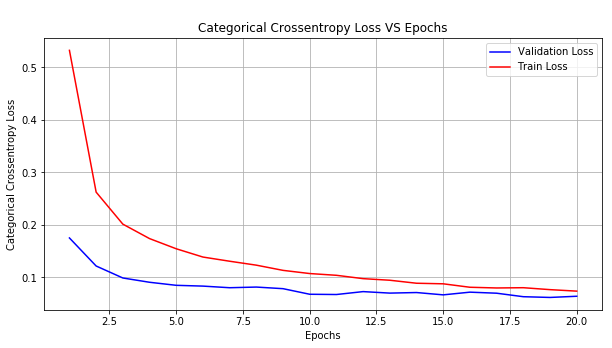

In [78]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

#fig,ax = plt.subplots(1,1)
#ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# Test and train accuracy of the model
model_drop_test_score = score[0]
model_drop_test_acc = score[1]
model_drop_train = history3.history['acc']


# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history3.history['val_loss']
ty = history3.history['loss']
plt_dynamic(x, vy, ty)

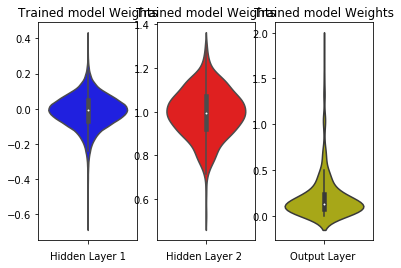

In [79]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

#MLP + ReLu activation + Adam Optimizer + BN+Dropout+ 3-Layer

In [80]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras.initializers import he_normal

#paramter
output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20


# Initialising model
model3_drop = Sequential()

# Adding first hidden layer
model3_drop.add(Dense(554, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

# Adding second hidden layer
model3_drop.add(Dense(225, activation='relu', kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

# Adding third hidden layer
model3_drop.add(Dense(78, activation='relu', kernel_initializer=he_normal(seed=None)))
model3_drop.add(BatchNormalization())
model3_drop.add(Dropout(0.5))

model3_drop.add(Dense(output_dim, activation='softmax'))


model3_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 554)               434890    
_________________________________________________________________
dense_31 (Dense)             (None, 225)               124875    
_________________________________________________________________
dense_32 (Dense)             (None, 78)                17628     
_________________________________________________________________
batch_normalization_17 (Batc (None, 78)                312       
_________________________________________________________________
dropout_17 (Dropout)         (None, 78)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 10)                790       
Total params: 578,495
Trainable params: 578,339
Non-trainable params: 156
_________________________________________________________________


In [81]:
model3_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history4 = model3_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.3175 - acc: 0.9073 - val_loss: 0.1184 - val_acc: 0.9651
Epoch 2/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.1226 - acc: 0.9649 - val_loss: 0.0953 - val_acc: 0.9699
Epoch 3/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.0795 - acc: 0.9769 - val_loss: 0.0917 - val_acc: 0.9740
Epoch 4/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.0608 - acc: 0.9818 - val_loss: 0.0717 - val_acc: 0.9785
Epoch 5/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.0457 - acc: 0.9858 - val_loss: 0.0913 - val_acc: 0.9734
Epoch 6/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.0399 - acc: 0.9879 - val_loss: 0.0932 - val_acc: 0.9738
Epoch 7/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.0302 - acc: 0.9910 - val_loss: 0.0754 - val_acc

Test score: 0.07663734175693944
Test accuracy: 0.9838


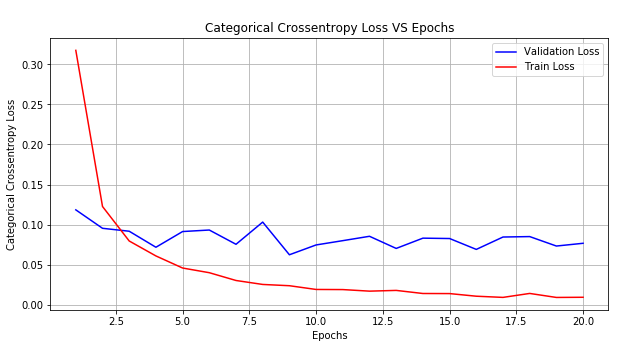

In [82]:
score = model3_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

#fig,ax = plt.subplots(1,1)
#ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# Test and train accuracy of the model
model3_drop_test_score = score[0]
model3_drop_test_acc = score[1]
model3_drop_train = history4.history['acc']

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history4.history['val_loss']
ty = history4.history['loss']
plt_dynamic(x, vy, ty)

#MLP + ReLu activation + Adam Optimizer + BN+Dropout+ 5-Layer

In [83]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras.initializers import he_normal

#paramter
output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

# Initialising model
model4_drop = Sequential()

# Adding first hidden layer
model4_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
# Adding Batch Normalization
model4_drop.add(BatchNormalization())
# Adding dropout
model4_drop.add(Dropout(0.5))

# Adding second hidden layer
model4_drop.add(Dense(256, activation='relu', kernel_initializer=he_normal(seed=None)))
# Adding Batch Normalization
model4_drop.add(BatchNormalization())
# Adding dropout
model4_drop.add(Dropout(0.5))

# Adding third hidden layer
model4_drop.add(Dense(128, activation='relu', kernel_initializer=he_normal(seed=None)))
# Adding Batch Normalization
model4_drop.add(BatchNormalization())
# Adding dropout
model4_drop.add(Dropout(0.5))

# Adding fourth hidden layer
model4_drop.add(Dense(64, activation='relu', kernel_initializer=he_normal(seed=None)))
# Adding Batch Normalization
model4_drop.add(BatchNormalization())
# Adding dropout
model4_drop.add(Dropout(0.5))

# Adding fifth hidden layer
model4_drop.add(Dense(32, activation='relu', kernel_initializer=he_normal(seed=None)))
# Adding Batch Normalization
model4_drop.add(BatchNormalization())
# Adding dropout
model4_drop.add(Dropout(0.5))

# Adding output layer
model4_drop.add(Dense(output_dim, activation='softmax'))


model4_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_18 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_19 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_19 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 128)               32896     
__________

In [84]:
model4_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history5 = model4_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 138us/step - loss: 1.4364 - acc: 0.5277 - val_loss: 0.3345 - val_acc: 0.9116
Epoch 2/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.5814 - acc: 0.8349 - val_loss: 0.1847 - val_acc: 0.9483
Epoch 3/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.3939 - acc: 0.8993 - val_loss: 0.1560 - val_acc: 0.9589
Epoch 4/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.3255 - acc: 0.9214 - val_loss: 0.1461 - val_acc: 0.9617
Epoch 5/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.2819 - acc: 0.9328 - val_loss: 0.1263 - val_acc: 0.9671
Epoch 6/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.2521 - acc: 0.9405 - val_loss: 0.1182 - val_acc: 0.9713
Epoch 7/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.2322 - acc: 0.9458 - val_loss: 0.1061 - val_a

Test score: 0.08122210750945379
Test accuracy: 0.982


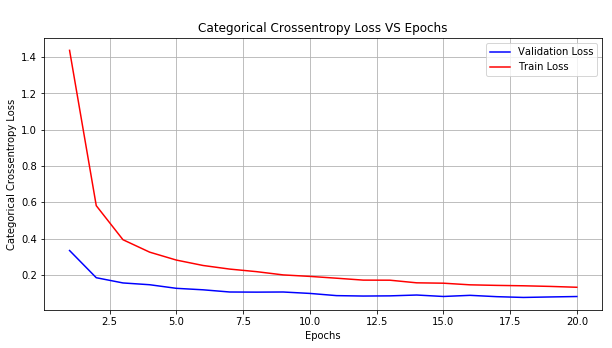

In [85]:
score = model4_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

#fig,ax = plt.subplots(1,1)
#ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
model4_drop_test_score = score[0]
model4_drop_test_acc = score[1]
model4_drop_train = history5.history['acc']

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history5.history['val_loss']
ty = history5.history['loss']
plt_dynamic(x, vy, ty)

#Summerize

In [86]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model","Train accuracy", "Test accuracy"]
x.add_row(["MLP + ReLu activation + Adam Optimizer + BN+Dropout+ 2-Layer", model_drop_train[19],model_drop_test_acc])
x.add_row(["MLP + ReLu activation + Adam Optimizer + BN+Dropout+ 3-Layer", model3_drop_train[19],model3_drop_test_acc])
x.add_row(["MLP + ReLu activation + Adam Optimizer + BN+Dropout+ 5-Layer", model4_drop_train[19],model4_drop_test_acc])
print(x)

+--------------------------------------------------------------+--------------------+---------------+
|                            Model                             |   Train accuracy   | Test accuracy |
+--------------------------------------------------------------+--------------------+---------------+
| MLP + ReLu activation + Adam Optimizer + BN+Dropout+ 2-Layer | 0.9780333333651224 |     0.981     |
| MLP + ReLu activation + Adam Optimizer + BN+Dropout+ 3-Layer | 0.9971833333333333 |     0.9838    |
| MLP + ReLu activation + Adam Optimizer + BN+Dropout+ 5-Layer | 0.9697666666348775 |     0.982     |
+--------------------------------------------------------------+--------------------+---------------+


Observation:

for 2-Layer Model, train accuracy little lower than test accuracy

train accuracy also low for higher number of layer 

Test accuracy almost same for all case